<a href="https://colab.research.google.com/github/bazrafshanmh/hands-ml/blob/master/end2endMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from functools import *
!pip install ipympl seaborn scikit_learn
%matplotlib widget
plt.ion()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00


In [ ]:
# Import libraries
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def loadData():
  tarball_path = Path("datasets/housing.tgz")
  Path("datasets").mkdir(parents=True, exist_ok=True)
  url="https://github.com/ageron/data/raw/main/housing.tgz"
  urllib.request.urlretrieve(url, tarball_path)
  with tarfile.open(tarball_path) as housing_tarball:
    housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))


In [ ]:
housing = loadData()

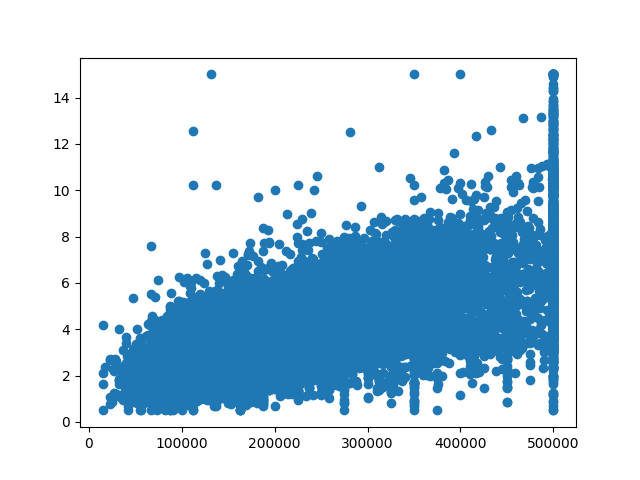

In [ ]:
fig = plt.figure()
plt.scatter(housing["median_house_value"],housing["median_income"])
plt.show()


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

## *Train_Test_split*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [ ]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

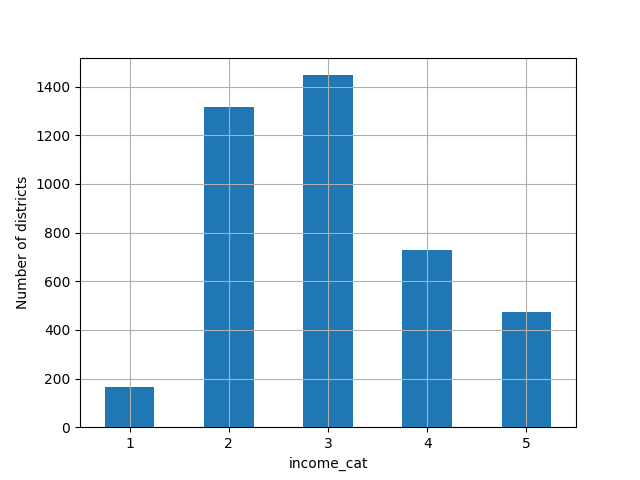

In [ ]:
fig = plt.figure()
fig.clear()
plt.xlabel("Categorical Income")
plt.ylabel("Number of districts")
strat_test_set["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.show()


In [ ]:
reduce(lambda a, b: a and b, [str("%.2f" % i)[:3]=="0.2" for i in strat_test_set["income_cat"].value_counts()/strat_train_set["income_cat"].value_counts()])

True

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

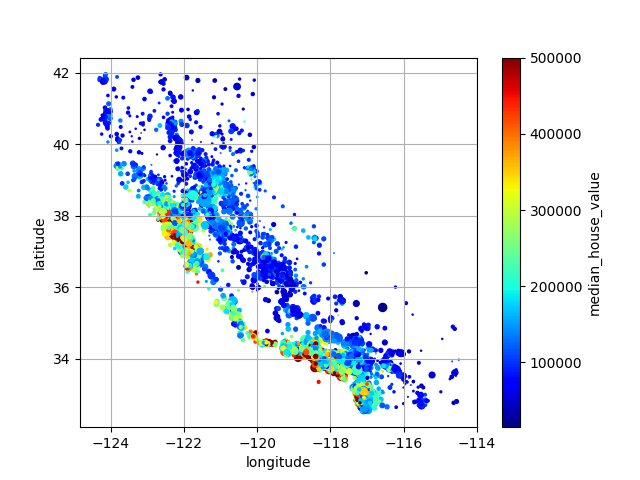

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/200, c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False)

In [ ]:
corr_matrix = housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()

In [ ]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

<Axes: >

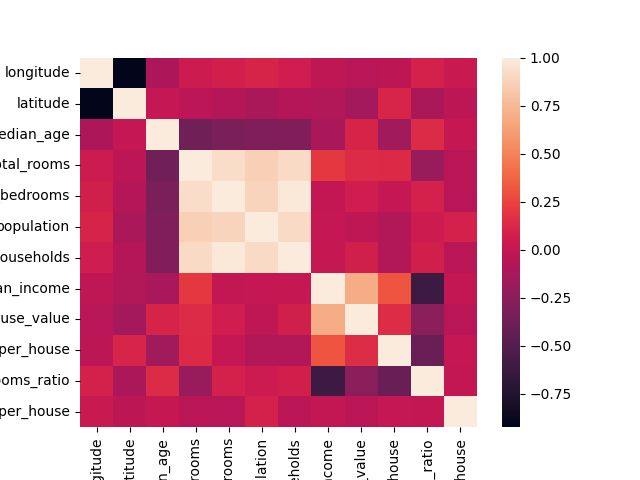

In [ ]:
from seaborn import heatmap
corr_matrix=housing.loc[:, ~housing.columns.str.contains('ocean_proximity')].corr()
fig = plt.figure()
fig.clear()
heatmap(corr_matrix)

In [ ]:
corr_matrix["median_house_value"]

longitude            -0.050859
latitude             -0.139584
housing_median_age    0.102175
total_rooms           0.137455
total_bedrooms        0.054635
population           -0.020153
households            0.071426
median_income         0.688380
median_house_value    1.000000
rooms_per_house       0.143663
bedrooms_ratio       -0.256397
people_per_house     -0.038224
Name: median_house_value, dtype: float64

# Seperate X and Y

In [ ]:
X_train, y_train = strat_train_set.drop("median_house_value", axis=1), strat_train_set["median_house_value"].copy()
X_test, y_test = strat_test_set.drop("median_house_value", axis=1), strat_test_set["median_house_value"].copy()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
housing_num = housing.select_dtypes(include=[np.number])
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(housing_num)
housing_num = pd.DataFrame(imputed, columns=housing_num.columns, index=housing_num.index)

Category Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)


In [ ]:
# housing_cat_1hot.toarray().shape
df_output = pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=housing_cat.index)

In [ ]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = scaler.fit_transform(housing_num)
housing_num_min_max_scaled = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)


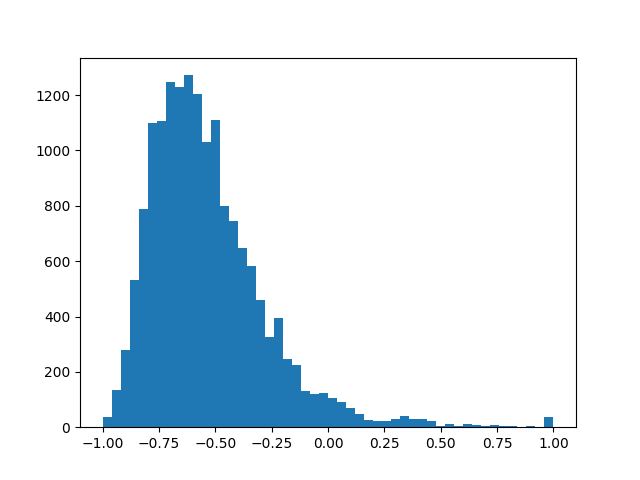

In [ ]:
fig = plt.figure()
fig.clear()
plt.hist(housing_num_min_max_scaled["median_income"], bins=50)
plt.show()

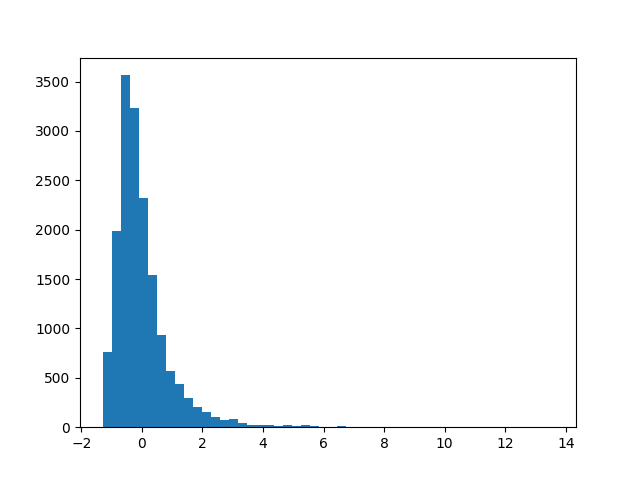

In [ ]:
fig = plt.figure()
fig.clear()
from sklearn.preprocessing import StandardScaler
Sscaler = StandardScaler()
scaled = Sscaler.fit_transform(housing_num)
scaled = pd.DataFrame(scaled, housing_num.index, columns=housing_num.columns)
plt.hist(scaled["population"], bins=50)
plt.show()



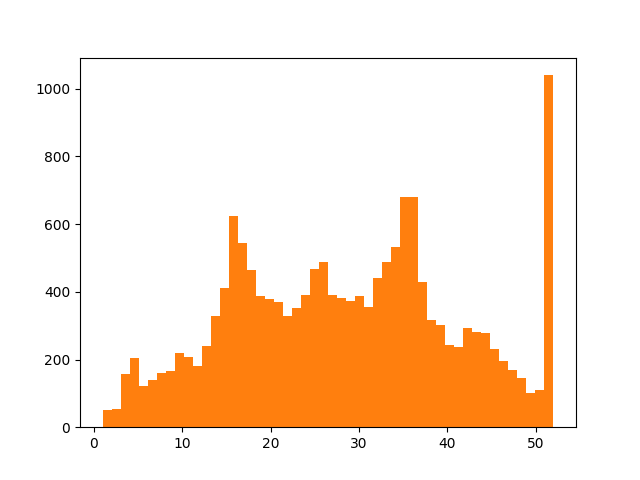

In [ ]:
plt.hist(housing["housing_median_age"], bins=50)
plt.show()

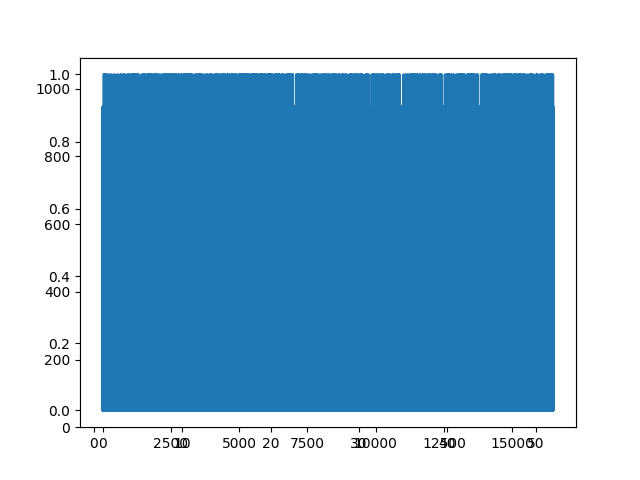

In [ ]:
fig = plt.figure()
fig.clear()
from sklearn.metrics.pairwise import rbf_kernel
age_sim_35 = rbf_kernel(np.linespac(housing["housing_median_age"]).reshape(-1, 1), [[35]], gamma=0.1)
plt.hist(housing["housing_median_age"], bins=50)
fig1 = fig.subplots()
fig1.plot(age_sim_35)
plt.show()


In [ ]:
help(np.log)

Help on ufunc:

log = <ufunc 'log'>
    log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])
    
    Natural logarithm, element-wise.
    
    The natural logarithm `log` is the inverse of the exponential function,
    so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
    `e`.
    
    Parameters
    ----------
    x : array_like
        Input value.
    out : ndarray, None, or tuple of ndarray and None, optional
        A location into which the result is stored. If provided, it must have
        a shape that the inputs broadcast to. If not provided or None,
        a freshly-allocated array is returned. A tuple (possible only as a
        keyword argument) must have length equal to the number of outputs.
    where : array_like, optional
        This condition is broadcast over the input. At locations where the
        condition is True, the `out` array will be set to the ufunc result.
        Elsewhere, t